<a href="https://colab.research.google.com/github/kouseizack/NLP/blob/master/text_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [0]:
cd nlp_basics/

/content/drive/My Drive/nlp_basics


ls

In [0]:
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm
import nltk # general NLP
import re 
import copy
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

In [0]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [0]:
data_train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [0]:
col_names = data_train.columns.values[2:]
col_names = col_names.tolist()
col_names.append('None')
col_names

['toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate',
 'None']

In [0]:
x = [sum(data_train[y]) for y in data_train.columns.values[2:]]
x.append(len(data_train) - sum(x))
x

[15294, 1595, 8449, 478, 7877, 1405, 124473]

Text(0, 0.5, 'Occurrence')

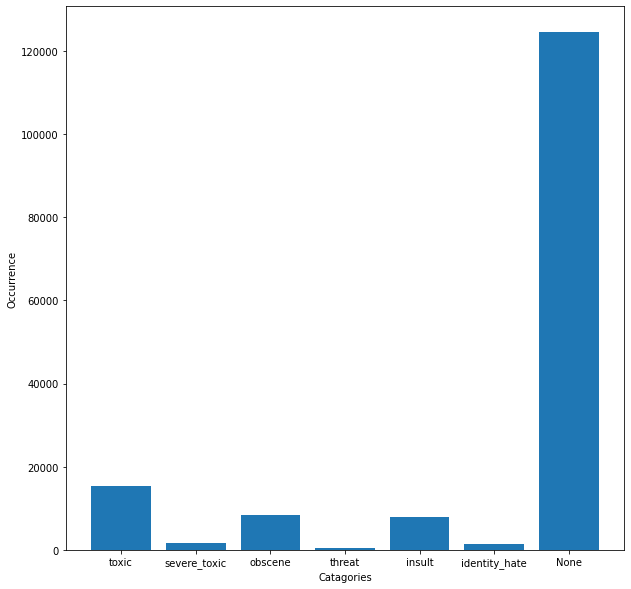

In [0]:
plt.figure(figsize = (10, 10))
plt.bar(np.arange(len(x)),x)
plt.xticks(np.arange(len(x)), col_names)
plt.xlabel('Catagories')
plt.ylabel('Occurrence')

In [0]:
train_sentences = data_train['comment_text'].values.tolist()
print (train_sentences[0])
test_sentences = data_test['comment_text'].values.tolist()
print (len(test_sentences))
total_ = copy.deepcopy(train_sentences)
total_.extend(test_sentences)
print (len(total_))
print (total_[0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
153164
312735
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [0]:
for i in tqdm(range(len(total_))):
    total_[i] = str(total_[i]).lower()
print (total_[0])

100%|██████████| 312735/312735 [00:00<00:00, 702476.93it/s]

explanation
why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27


In [0]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z0-9]"," ", raw)
    words = clean.split()
    return words

In [0]:
#clean_lower = list of sentences, where each element in the list is list of words in a sentece.
clean_lower = []
for i in tqdm(range(len(total_))):
    clean_lower.append(sentence_to_wordlist(total_[i]))
clean_lower[0]   #list of words in a raw sentence in lower_case

100%|██████████| 312735/312735 [00:09<00:00, 31966.37it/s]


['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'were',
 'reverted',
 'they',
 'weren',
 't',
 'vandalisms',
 'just',
 'closure',
 'on',
 'some',
 'gas',
 'after',
 'i',
 'voted',
 'at',
 'new',
 'york',
 'dolls',
 'fac',
 'and',
 'please',
 'don',
 't',
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 'i',
 'm',
 'retired',
 'now',
 '89',
 '205',
 '38',
 '27']

In [0]:
import nltk
nltk.download("stopwords")
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
clean = []
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
s = list(stop_words)
print (clean_lower[0])

['explanation', 'why', 'the', 'edits', 'made', 'under', 'my', 'username', 'hardcore', 'metallica', 'fan', 'were', 'reverted', 'they', 'weren', 't', 'vandalisms', 'just', 'closure', 'on', 'some', 'gas', 'after', 'i', 'voted', 'at', 'new', 'york', 'dolls', 'fac', 'and', 'please', 'don', 't', 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', 'i', 'm', 'retired', 'now', '89', '205', '38', '27']


In [0]:
#clean_sentences = list of sentences, where each sentence does not contain any stopword.
clean_sentences = []                     
clean = []

for lists in clean_lower:
    clean = []
    for words in lists:
        if words not in s:
            clean.append(words)
    clean_sentences.append(clean)
print (len(clean_sentences))

312735


In [0]:
print (clean_sentences[0])
print (clean_sentences[7499])
print (clean_sentences[7501])


['explanation', 'edits', 'made', 'username', 'hardcore', 'metallica', 'fan', 'reverted', 'vandalisms', 'closure', 'gas', 'voted', 'new', 'york', 'dolls', 'fac', 'please', 'remove', 'template', 'talk', 'page', 'since', 'retired', '89', '205', '38', '27']
['create', 'account', 'like', 'said', 'computer', 'accsese', 'plz', 'unblock', 'aol', 'ip', 'address', 'talk', 'pepole', 'vandle', 'harrased', 'see', 'mind', 'aol', 'ip', 'address', 'thanks']
['hint', 'bit', 'jealousy', 'could', 'potentially', 'wikipedia', 'made', 'something', 'little', 'cunt', 'edits', 'site', 'grow', 'fuck']


In [0]:
#stemming is used to convert all words to their root words (for eg. run ,ran, runnning -> run) 
def stemmer(sentence_list):
  stem_sentence = []
  for word in sentence_list:
    stem_sentence.append(ps.stem(word))
  return stem_sentence
corpus = []
v =  len(clean_sentences)
j = 0
test = clean_sentences[153166:]
print (test[0])
for i in range(1,10):
    for j in range(j , (i * 8000)+1):
      corpus.append(stemmer(clean_sentences[j]))
      j = j+1
j = 0
for i in range(1,10):
    for j in range(j , (i * 8000)+1):
      corpus.append(stemmer(test[j]))
      j = j+1
print (corpus[0])
print (len(corpus))

['simply', 'delete', 'comments', 'future', 'violates', 'wikipedia', 'policies', 'know', 'trying', 'avoid', 'acknowledging', 'seemingly', 'stubborn', 'delete', 'comments']
['explan', 'edit', 'made', 'usernam', 'hardcor', 'metallica', 'fan', 'revert', 'vandal', 'closur', 'ga', 'vote', 'new', 'york', 'doll', 'fac', 'pleas', 'remov', 'templat', 'talk', 'page', 'sinc', 'retir', '89', '205', '38', '27']
144002


In [0]:
from gensim.models import Word2Vec
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
model = Word2Vec(corpus, size=100, window=5, min_count=1, workers=4)
model.train(corpus,total_examples=len(corpus),epochs=10)
w1 = "talk"
print (model.wv.most_similar (positive=w1))

[('discuss', 0.517479658126831), ('repli', 0.5102440714836121), ('mamoru', 0.5060619711875916), ('talkpag', 0.49717751145362854), ('comment', 0.48162877559661865), ('arggeo', 0.46280503273010254), ('blank', 0.4550546407699585), ('post', 0.4525763690471649), ('messag', 0.45044219493865967), ('aboutther', 0.4503726363182068)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[('revert', 0.5904747247695923), ('contribut', 0.5882786512374878), ('chang', 0.5862382650375366), ('revis', 0.5626806020736694), ('vandal', 0.5306258201599121), ('revers', 0.5214443206787109), ('disrupt', 0.5081655979156494), ('editor', 0.4735698103904724), ('appear', 0.4603016972541809), ('user', 0.45855507254600525)]


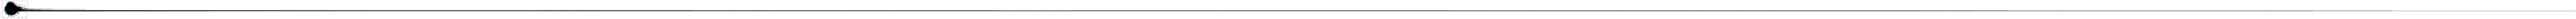

In [0]:
w1 = "edit"
print (model.wv.most_similar (positive=w1))

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [0]:
z = 0
size = model.vector_size
for w in model.wv.vocab:
  z = z + model.wv.vocab[w].count
out = []
for sentence in corpus:
  vs = np.zeros(size)
  for token in sentence:
    sent_len = len(sentence)
    if token in model.wv.vocab:
      sif_value = 0.001/(1 + (model.wv.vocab[token].count/z))
      vs = np.add(vs , np.multiply(sif_value , model.wv[token]))
      vs = np.divide(vs , sent_len)
  out.append(vs)

print (np.vstack(out).shape)

(144002, 100)


In [0]:
data_train.iloc[:,2:]
x = np.vstack(out)

In [0]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.7MB/s 


In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import LabelPowerset
from sklearn import metrics
X = pd.DataFrame(x)
X_train , X_test , Y_train , Y_test = train_test_split(X.iloc[:72000 , :],data_train.iloc[:72000 , 2:] ,random_state=42, test_size=0.30, shuffle=True)
print(Y_train.shape , X_train.shape)

(50400, 6) (50400, 100)


In [0]:
classifier = LabelPowerset(SVC(kernel='linear', probability=True, random_state=42))
#svm = SVC(kernel='linear', probability=True, random_state=42)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8971296296296296
